In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
!unzip -q '/content/drive/My Drive/Deep Learning/datasets/Kaggle/Sign_Language_Characters/sign_mnist_test.zip' -d '/content/drive/My Drive/Deep Learning/datasets/Kaggle/Sign_Language_Characters'
!unzip -q '/content/drive/My Drive/Deep Learning/datasets/Kaggle/Sign_Language_Characters/sign_mnist_train.zip' -d '/content/drive/My Drive/Deep Learning/datasets/Kaggle/Sign_Language_Characters'

In [0]:
import numpy as np
import pandas as pd
from glob import glob
from tqdm import tqdm
import matplotlib.pyplot as plt
import random
from PIL import Image

from sklearn.model_selection import train_test_split
import keras
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import RMSprop, Adam
#from keras.preprocessing.image import ImageDataGenerator
#from keras.callbacks import ReduceLROnPlateau

In [0]:
train_file_path = '/content/drive/My Drive/Deep Learning/datasets/Kaggle/Sign_Language_Characters/sign_mnist_train.csv'
test_file_path = '/content/drive/My Drive/Deep Learning/datasets/Kaggle/Sign_Language_Characters/sign_mnist_test.csv'

train = pd.read_csv(train_file_path)
test = pd.read_csv(test_file_path)

In [32]:
train.head()

label  pixel1  pixel2  pixel3  ...  pixel781  pixel782  pixel783  pixel784
0      3     107     118     127  ...       206       204       203       202
1      6     155     157     156  ...       175       103       135       149
2      2     187     188     188  ...       198       195       194       195
3      2     211     211     212  ...       225       222       229       163
4     13     164     167     170  ...       157       163       164       179

[5 rows x 785 columns]

In [0]:
train_labels = train['label']
test_labels = test['label']

In [0]:
train = train.drop(columns=['label'])
test = test.drop(columns=['label'])

In [0]:
# Normalizing
train = train / 255.0
test = test / 255.0

# Reshape
x_train = train.values.reshape(-1,28,28,1)
x_test = test.values.reshape(-1,28,28,1)

In [71]:
print(x_train.shape)
print(x_test.shape)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [0]:
random_seed = 2

# Split the train and the validation set for the fitting
x_train, x_val, y_train, y_val = train_test_split(x_train, train_labels, test_size = 0.2, random_state=random_seed)

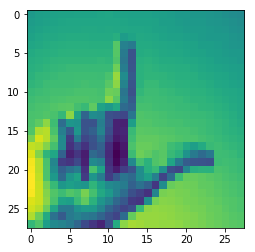

In [78]:
# an example
index = 15
plt.imshow(x_train[index][:,:,0])

In [82]:
## CNN Model
model = Sequential()

model.add(Conv2D(filters = 64, kernel_size = (5,5), padding ='Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5), padding ='Same', 
                 activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.5))


model.add(Conv2D(filters = 128, kernel_size = (3,3), padding ='Same', 
                 activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding ='Same', 
                 activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(26, activation = "softmax"))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 64)        1664      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 64)        102464    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 7, 7, 64)          256       
_________________________________________________________________
dropout_4 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 7, 7, 128)        

In [0]:
# Define the optimizer
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

In [84]:
# Compile the model
model.compile(optimizer ='Adam' , loss = "sparse_categorical_crossentropy", metrics=["accuracy"])

In [85]:
history = model.fit(x_train, y_train, batch_size = 86, epochs = 50, 
          validation_data = (x_val, y_val), verbose = 1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 21964 samples, validate on 5491 samples
Epoch 1/50
21964/21964 [==============================] - 11s 489us/step - loss: 2.0870 - acc: 0.3810 - val_loss: 0.9792 - val_acc: 0.6420
Epoch 2/50
21964/21964 [==============================] - 6s 292us/step - loss: 0.5981 - acc: 0.7965 - val_loss: 0.1498 - val_acc: 0.9627
Epoch 3/50
21964/21964 [==============================] - 6s 286us/step - loss: 0.2791 - acc: 0.9069 - val_loss: 0.0285 - val_acc: 0.9973
Epoch 4/50
21964/21964 [==============================] - 6s 289us/step - loss: 0.1571 - acc: 0.9506 - val_loss: 0.2725 - val_acc: 0.9049
Epoch 5/50
21964/21964 [==============================] - 6s 294us/step - loss: 0.1181 - acc: 0.9622 - val_loss: 0.0051 - val_acc: 1.0000
Epoch 6/50
21964/21964 [==============================] - 6s 291us/step - loss: 0.0930 - acc: 0.9701 - val_loss: 0.0050 - val_acc: 0.9996
Epoch 7/50
21964/21964 [====

In [0]:
# predict results
res = model.predict(x_test)

# select the indix with the maximum probability
res = np.argmax(res,axis = 1)
#print(results)

In [90]:
print(res)

[ 6  5 10 ...  2  4  2]


In [47]:
# ord('A') --> ord('A')+25 = Z   ###### 0 --> 25
List = list( map(chr, range(ord('A'), ord('Z')+1)) )

idx_2_ch_dictionary = { idx : List[idx] for idx in range(0,len(List)) }
ch_2_idx_dictionary = { idx_2_ch_dictionary[i] : i for i in range(len(idx_2_ch_dictionary)) }

print(idx_2_ch_dictionary)
print()
print(ch_2_idx_dictionary)

{0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J', 10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S', 19: 'T', 20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y', 25: 'Z'}

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'J': 9, 'K': 10, 'L': 11, 'M': 12, 'N': 13, 'O': 14, 'P': 15, 'Q': 16, 'R': 17, 'S': 18, 'T': 19, 'U': 20, 'V': 21, 'W': 22, 'X': 23, 'Y': 24, 'Z': 25}


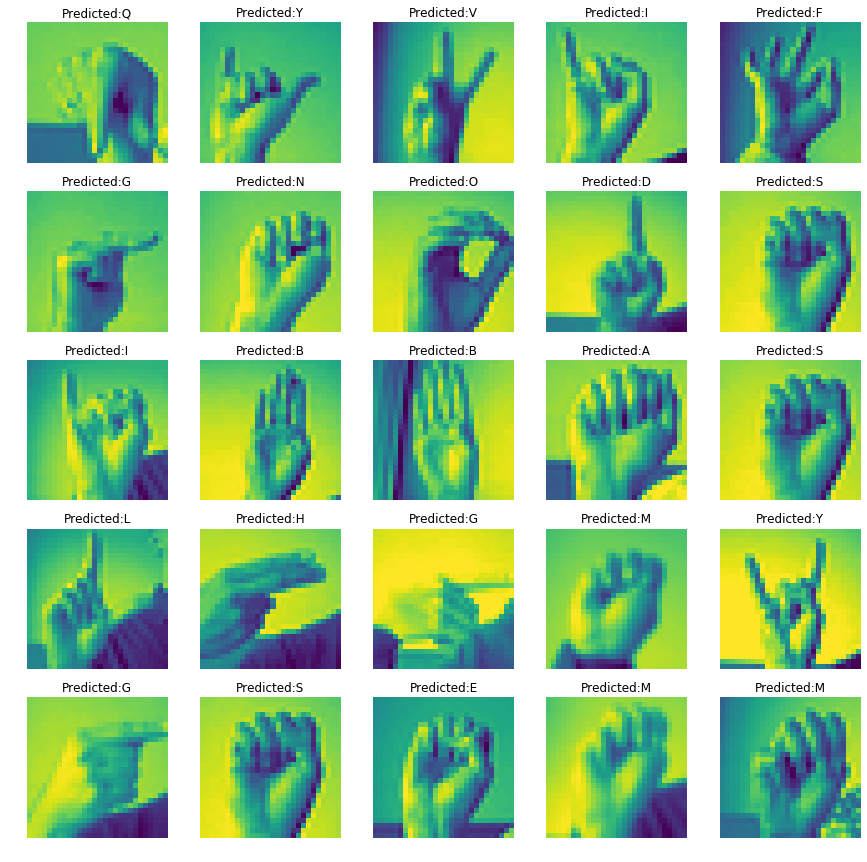

In [100]:
f, ax = plt.subplots(5, 5, figsize = (15, 15))

for i in range(0,25):
    #imgBGR = cv2.imread(test_dir + test_generator.filenames[i])
    #imgRGB = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2RGB)
    #im = Image.open(test_dir + '/' + test_generator.filenames[i])
    
    example = random.randint(0, len(x_test))
    
    predicted_class = idx_2_ch_dictionary[ res[example] ]

    ax[i//5, i%5].imshow(x_test[example][:,:,0])
    ax[i//5, i%5].axis('off')
    ax[i//5, i%5].set_title("Predicted:{}".format(predicted_class))    

plt.show()